<a href="https://colab.research.google.com/github/DanielZafra4/PruebaTecnicaColsubsidio/blob/main/Prueba_Tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Define la ruta base a tu carpeta en Google Drive
ruta_base = '/content/drive/MyDrive/Prueba técnica/'

# Cargar los archivos desde la ruta de Drive
try:
    df_consumos = pd.read_excel(f'{ruta_base}BD_CONSUMOS_PISCILAGO.xlsx')
    df_afiliados = pd.read_excel(f'{ruta_base}BD_AFILIADOS.xlsx')
    df_metrics = pd.read_excel(f'{ruta_base}METRICS.xlsx')
    df_digiturnos = pd.read_excel(f'{ruta_base}T_DIGITURNOS.xlsx')
    df_grupo_familiar = pd.read_excel(f'{ruta_base}AFILIADOS_A_CARGO.xlsx')
    df_est_col = pd.read_excel(f'{ruta_base}T_EST_COL.xlsx')

    print("Archivos cargados exitosamente desde Google Drive.")
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. Asegúrate de que la ruta sea correcta. {e}")
except Exception as e:
    print(f"Ocurrió un error al cargar los archivos: {e}")

Archivos cargados exitosamente desde Google Drive.


In [26]:
df_digiturnos.head()

,Sede,UES,Clasifiacion,Usuario_receptor,Tipo_servicio,SUBSERVICIO_HOMOLOGADO,Fecha_Servico,Hora_solicitud_Servicio,Hora_llamado__Servicio,Hora_finalizado_Servicio,Identificacion_Cliente,Tipo_Oficina
0,Calle 26,Subsidio,Radicacion afiliaciones,39767666,Servicio,Rad afiliacion trabajadores hasta 10 formularios,2024-03-20,10:49:41,10:54:47,10:56:03,29012215,Bogota
1,Calle 26,Subsidio,Radicacion afiliaciones,52622358,Servicio,Rad afiliacion trabajadores hasta 10 formularios,2024-09-07,10:08:56,10:09:18,10:12:34,20000240,Bogota
2,Calle 26,Subsidio,Radicacion afiliaciones,52622358,Servicio,Rad afiliacion trabajadores hasta 10 formularios,2024-09-07,10:12:34,10:12:34,10:16:37,20000240,Bogota
3,Calle 26,Subsidio,Tarjeta multiservicios,1024494171,Servicio,Entrega tams primera vez,2024-09-02,09:22:11,09:22:11,09:28:19,20000187,Bogota
4,Calle 26,Subsidio,Tarjeta multiservicios,1024494171,Servicio,Entrega tams primera vez,2024-09-02,09:21:12,09:21:12,09:22:11,20000187,Bogota


#Primer punto

In [12]:
# 1. Unir la base de consumos con la de afiliados (cruce principal)
df_merged = pd.merge(df_consumos, df_afiliados, left_on='IDENTIFICACION', right_on='NumIdPersona_Modificado', how='left', suffixes=('_consumo', '_afiliado'))

# 2. Unir los registros no coincidentes con la base de grupo familiar
df_merged_final = pd.merge(df_merged, df_grupo_familiar, left_on='IDENTIFICACION', right_on='NUM_IDENTIFICACION_PERSONA_A_CARGO', how='left', suffixes=('', '_grupo'))

# 3. Crear la columna 'Tipo_Afiliacion' para clasificar a los compradores
df_merged_final['Tipo_Afiliacion'] = np.where(df_merged_final['NumIdPersona_Modificado'].notnull(), 'Afiliado',
                                             np.where(df_merged_final['NUM_IDENTIFICACION_PERSONA_A_CARGO'].notnull(), 'Grupo Familiar', 'No Afiliado'))

# 4. Ajustar el valor de la compra para los productos con seguro
df_merged_final['Valor_subtotal_ajustado'] = df_merged_final['VALOR_SUBTOTAL'] - (df_merged_final['SEGURO'] * 1200)

print("Procesamiento de datos para el Ejercicio 1 completado.")
print("\nPrimeras 5 filas del DataFrame final (df_merged_final):")
df_merged_final.head()

Procesamiento de datos para el Ejercicio 1 completado.

Primeras 5 filas del DataFrame final (df_merged_final):


,PERIODO,ANIO,ESTADO,FECHA_COMPRA,DESC_PRODUCTO,VALOR_SUBTOTAL,SEGURO,IDENTIFICACION,NOMBRES,PUNTO_RECAUDO,...,Categoria,Segmento_poblacional,Piramide1,Piramide2,RazonSocial,Genero,NUM_IDENTIFICACION_AFILIADO,NUM_IDENTIFICACION_PERSONA_A_CARGO,Tipo_Afiliacion,Valor_subtotal_ajustado
0,202407,2024,FACTURADA,2024-07-17,ENTRADA PISCILAGO,60000.0,1,10000,C,TAQUILLA PISCILAGO,...,A,Basico,4 micro,4.1 estandar,MULTI IMPRESOS S A S,F,NaN,NaN,Afiliado,58800.0
1,202407,2024,FACTURADA,2024-07-17,ENTRADA PISCILAGO,60000.0,1,10000,C,TAQUILLA PISCILAGO,...,B,Medio,1 emp grandes,1.1 platinum,TELEPERFORMANCE COLOMBIA S A S,F,NaN,NaN,Afiliado,58800.0
2,202402,2024,FACTURADA,2024-02-24,ENTRADA PISCILAGO,60000.0,0,10001,C,TAQUILLA PISCILAGO,...,A,Basico,4 micro,4.3 trans.juridica ent. 11 a 99 trab.,YOLO DIGITAL PRODUCTIONS SAS,M,NaN,NaN,Afiliado,60000.0
3,202401,2024,FACTURADA,2024-01-01,ENTRADA PISCILAGO,53000.0,0,10002,IN,TAQUILLA PISCILAGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Afiliado,53000.0
4,202401,2024,FACTURADA,2024-01-27,PISCITOUR,93333.0,0,10003,C,TAQUILLA PISCILAGO,...,A,Basico,4 micro,4.5 transaccional,BENU B R SAS,M,NaN,NaN,Afiliado,93333.0


##A. Penetración

In [13]:
def calcular_penetracion(df_afiliados, df_merged_final, columna_agrupacion):

    # 1. Calcular el total de afiliados únicos por la columna de agrupación
    total_afiliados = df_afiliados.groupby(columna_agrupacion)['NumIdPersona_Modificado'].nunique().reset_index(name='Total_Afiliados')

    # 2. Calcular el número de compradores afiliados únicos por la misma columna
    compradores_afiliados = df_merged_final[df_merged_final['Tipo_Afiliacion'] == 'Afiliado'].groupby(columna_agrupacion)['IDENTIFICACION'].nunique().reset_index(name='Q_Compradores_Afiliados')

    # 3. Unir las dos tablas para calcular la penetración
    df_penetracion = pd.merge(compradores_afiliados, total_afiliados, on=columna_agrupacion, how='right').fillna(0)
    df_penetracion['Penetración (%)'] = (df_penetracion['Q_Compradores_Afiliados'] / df_penetracion['Total_Afiliados']) * 100

    return df_penetracion

# Lista de variables a analizar
variables = ['Categoria','Segmento_poblacional', 'Piramide1', 'Piramide2', 'Genero']

# Iterar sobre la lista para obtener la penetración para cada variable
for variable in variables:
    penetracion_resultado = calcular_penetracion(df_afiliados, df_merged_final, variable)
    print(f"\nPenetración por {variable.replace('_', ' ').title()}:")
    print(penetracion_resultado)


Penetración por Categoria:
  Categoria  Q_Compradores_Afiliados  Total_Afiliados  Penetración (%)
0         A                    86844           260150        33.382279
1         B                    22407            48952        45.773411
2         C                    15318            43461        35.245392

Penetración por Segmento Poblacional:
  Segmento_poblacional  Q_Compradores_Afiliados  Total_Afiliados  \
0                 Alto                      775             3468   
1               Basico                    65379           194822   
2                Joven                    30736            73791   
3                Medio                    41978           108105   

   Penetración (%)  
0        22.347174  
1        33.558325  
2        41.652776  
3        38.830766  

Penetración por Piramide1:
          Piramide1  Q_Compradores_Afiliados  Total_Afiliados  Penetración (%)
0     1 emp grandes                    35385            91165        38.814238
1       2 emp med

/tmp/ipython-input-2082865769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Penetración (%)', data=df, palette='viridis')


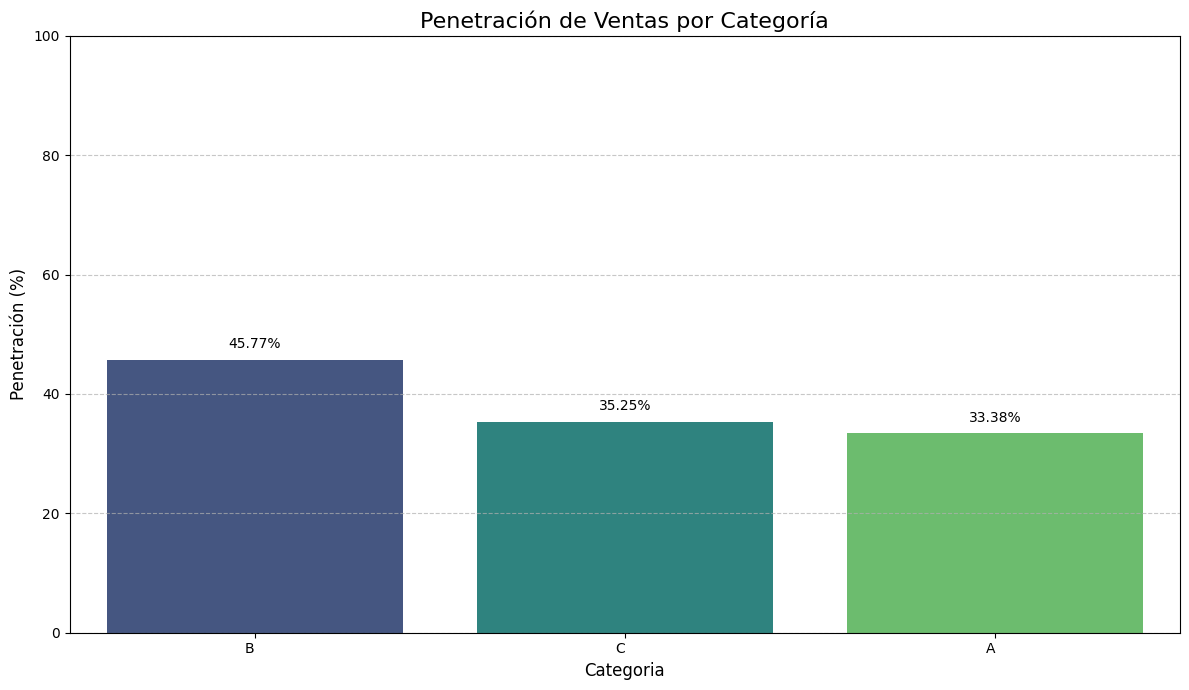

/tmp/ipython-input-2082865769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Penetración (%)', data=df, palette='viridis')


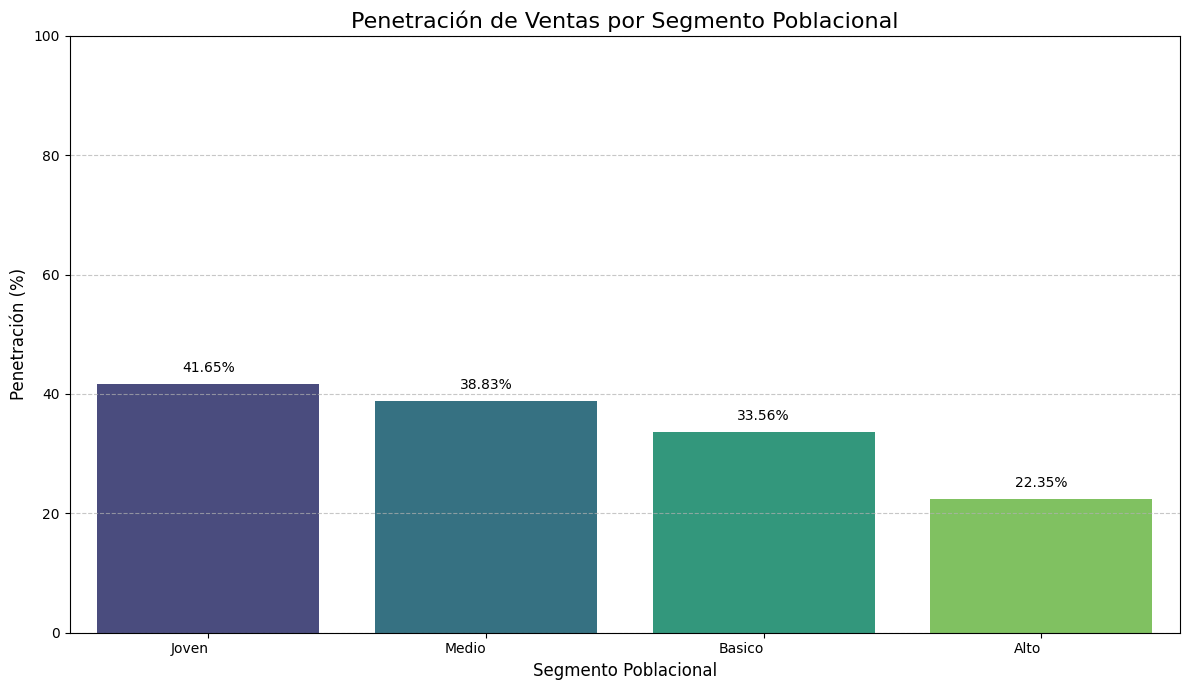

/tmp/ipython-input-2082865769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Penetración (%)', data=df, palette='viridis')


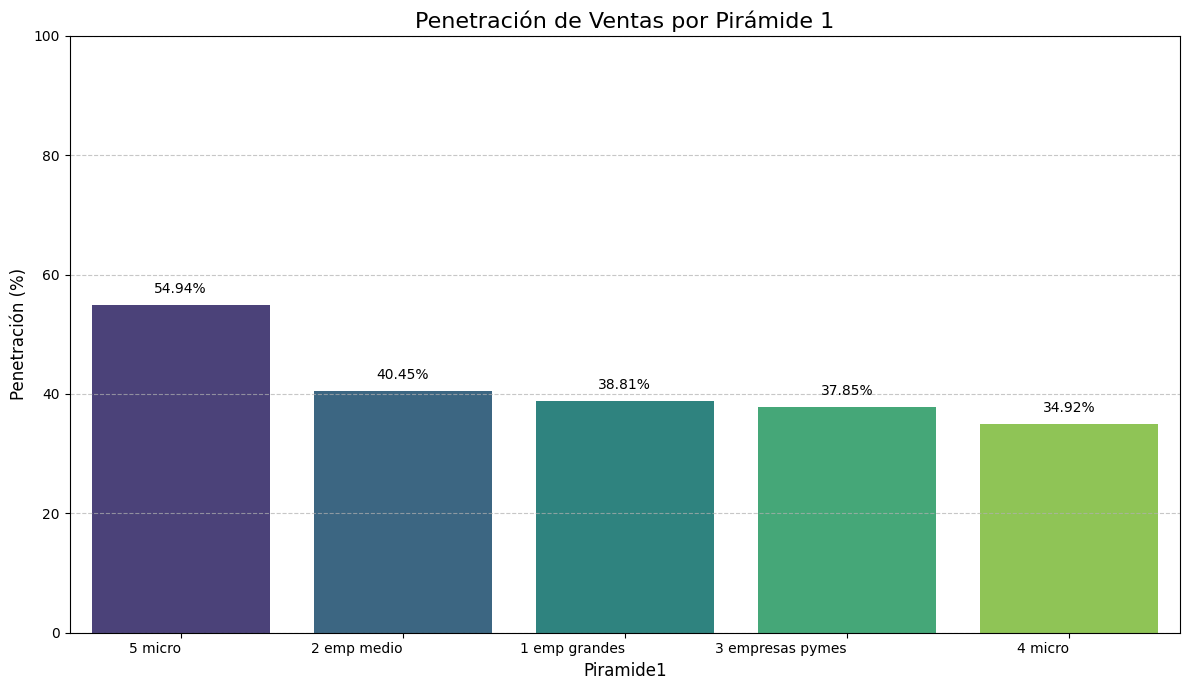

/tmp/ipython-input-2082865769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Penetración (%)', data=df, palette='viridis')


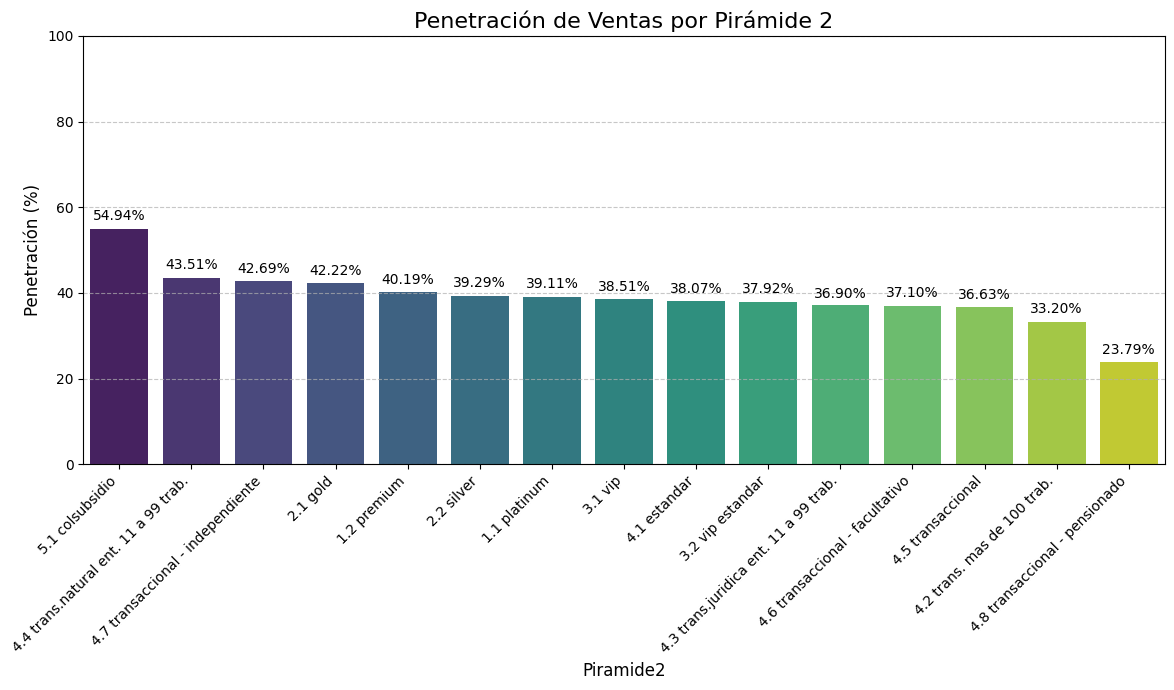

/tmp/ipython-input-2082865769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Penetración (%)', data=df, palette='viridis')


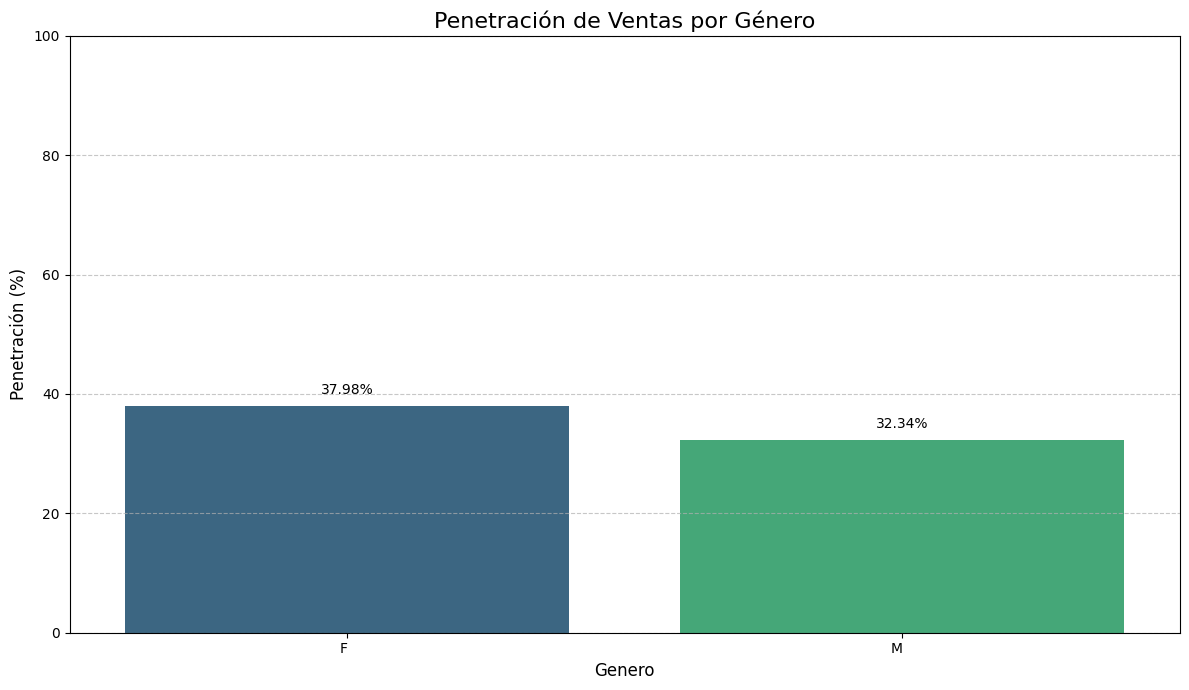

In [14]:
def graficar_penetracion(df, x_col, titulo, rotation=0):

    # Ordenar los datos para una mejor visualización
    df = df.sort_values(by='Penetración (%)', ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=x_col, y='Penetración (%)', data=df, palette='viridis')

    # Añadir etiquetas y título
    plt.title(titulo, fontsize=16)
    plt.xlabel(x_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Penetración (%)', fontsize=12)
    plt.ylim(0, 100)

    # Añadir las etiquetas de valor a las barras
    for index, row in df.iterrows():
        plt.text(index, row['Penetración (%)'] + 2, f"{row['Penetración (%)']:.2f}%", ha='center', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

# --- Definición de los DataFrames ---


# Penetración por Categoría
df_penetracion_categoria = pd.DataFrame({
    'Categoria': ['B', 'C', 'A'],
    'Penetración (%)': [45.773411, 35.245392, 33.382279]
})

# Penetración por Segmento Poblacional
df_penetracion_segmento = pd.DataFrame({
    'Segmento_poblacional': ['Joven', 'Medio', 'Basico', 'Alto'],
    'Penetración (%)': [41.652776, 38.830766, 33.558325, 22.347174]
})

# Penetración por Pirámide 1
df_penetracion_piramide1 = pd.DataFrame({
    'Piramide1': ['5 micro', '2 emp medio', '1 emp grandes', '3 empresas pymes', '4 micro'],
    'Penetración (%)': [54.941943, 40.451498, 38.814238, 37.849881, 34.923811]
})

# Penetración por Pirámide 2
df_penetracion_piramide2 = pd.DataFrame({
    'Piramide2': [
        '5.1 colsubsidio', '4.4 trans.natural ent. 11 a 99 trab.', '4.7 transaccional - independiente',
        '2.1 gold', '1.2 premium', '2.2 silver', '1.1 platinum', '3.1 vip', '4.1 estandar',
        '3.2 vip estandar', '4.6 transaccional - facultativo', '4.3 trans.juridica ent. 11 a 99 trab.',
        '4.5 transaccional', '4.2 trans. mas de 100 trab.', '4.8 transaccional - pensionado'
    ],
    'Penetración (%)': [
        54.941943, 43.510638, 42.693111, 42.224917, 40.185300, 39.291920, 39.111676,
        38.506166, 38.071861, 37.924845, 36.904762, 37.098491,
        36.628135, 33.201581, 23.793059
    ]
})

# Penetración por Género
df_penetracion_genero = pd.DataFrame({
    'Genero': ['F', 'M'],
    'Penetración (%)': [37.981385, 32.338980]
})

# --- Llamadas a la función de graficación para cada DataFrame ---
graficar_penetracion(df_penetracion_categoria, 'Categoria', 'Penetración de Ventas por Categoría')
graficar_penetracion(df_penetracion_segmento, 'Segmento_poblacional', 'Penetración de Ventas por Segmento Poblacional')
graficar_penetracion(df_penetracion_piramide1, 'Piramide1', 'Penetración de Ventas por Pirámide 1')
graficar_penetracion(df_penetracion_piramide2, 'Piramide2', 'Penetración de Ventas por Pirámide 2', rotation=45)
graficar_penetracion(df_penetracion_genero, 'Genero', 'Penetración de Ventas por Género')

###Análisis de la Penetración


*   Por Categoría: La penetración es más alta en la Categoría B (45.77%), lo que indica que casi la mitad de los afiliados en esta categoría visitan el parque. Por otro lado, la Categoría A (33.38%) tiene la penetración más baja.
*   Por Segmento Poblacional: El segmento Joven (41.65%) y Medio (38.83%) son los que más visitan el parque, mientras que el segmento Alto (22.34%) es el que menos lo hace.
*   Por Pirámide: La pirámide "5 micro" (54.94%) tiene una penetración excepcionalmente alta, casi el doble que la penetración promedio.
*   Por Género: Hay una diferencia notable, con las mujeres (37.98%) mostrando una mayor penetración que los hombres (32.34%).

##B. Participación

In [15]:
def calcular_participacion(df_merged_final, columna_agrupacion):

    # 1. Calcular el total de compradores únicos en la base de datos
    total_compradores_totales = df_merged_final['IDENTIFICACION'].nunique()

    # 2. Contar el número de compradores por el grupo de interés
    compradores_por_grupo = df_merged_final.groupby(columna_agrupacion)['IDENTIFICACION'].nunique().reset_index(name='Q_Compradores')

    # 3. Calcular la participación
    compradores_por_grupo['Participación (%)'] = (compradores_por_grupo['Q_Compradores'] / total_compradores_totales) * 100

    return compradores_por_grupo

# Lista de variables a analizar
variables = ['Categoria', 'Segmento_poblacional', 'Piramide1', 'Piramide2', 'Genero']

# Iterar sobre la lista para obtener la participación para cada variable
for variable in variables:
    participacion_resultado = calcular_participacion(df_merged_final, variable)
    print(f"\nParticipación por {variable.replace('_', ' ').title()}:")
    print(participacion_resultado)


Participación por Categoria:
  Categoria  Q_Compradores  Participación (%)
0         A          86844          59.867641
1         B          22407          15.446712
2         C          15318          10.559768

Participación por Segmento Poblacional:
  Segmento_poblacional  Q_Compradores  Participación (%)
0                 Alto            775           0.534262
1               Basico          65379          45.070316
2                Joven          30736          21.188474
3                Medio          41978          28.938370

Participación por Piramide1:
          Piramide1  Q_Compradores  Participación (%)
0     1 emp grandes          35385          24.393354
1       2 emp medio          25158          17.343168
2  3 empresas pymes          25652          17.683717
3           4 micro          61790          42.596167
4           5 micro           1940           1.337378

Participación por Piramide2:
                                Piramide2  Q_Compradores  Participación (%)


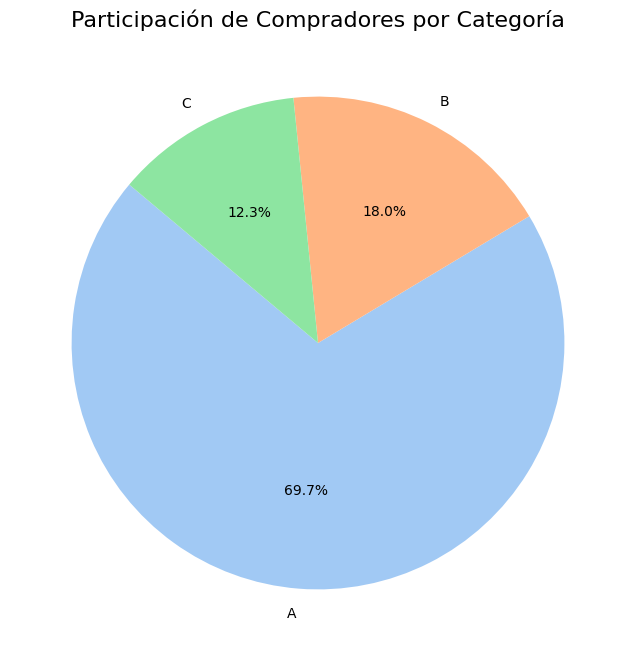

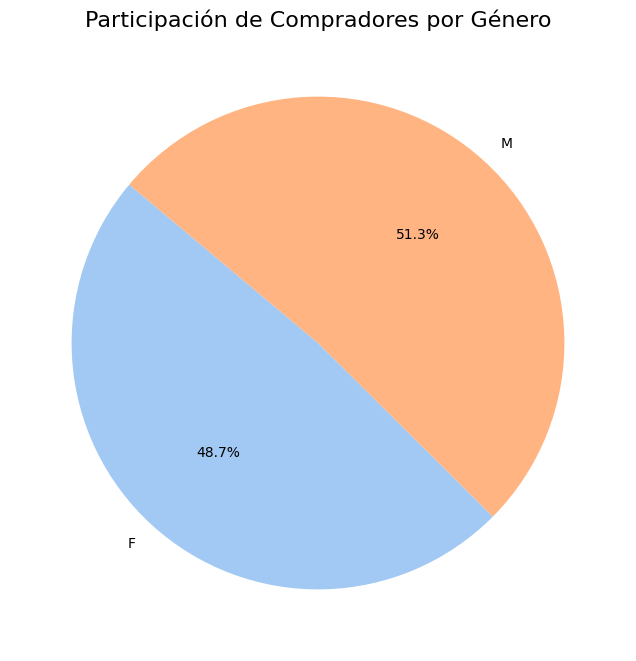

/tmp/ipython-input-2092624044.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Participación (%)', data=df, palette='flare')


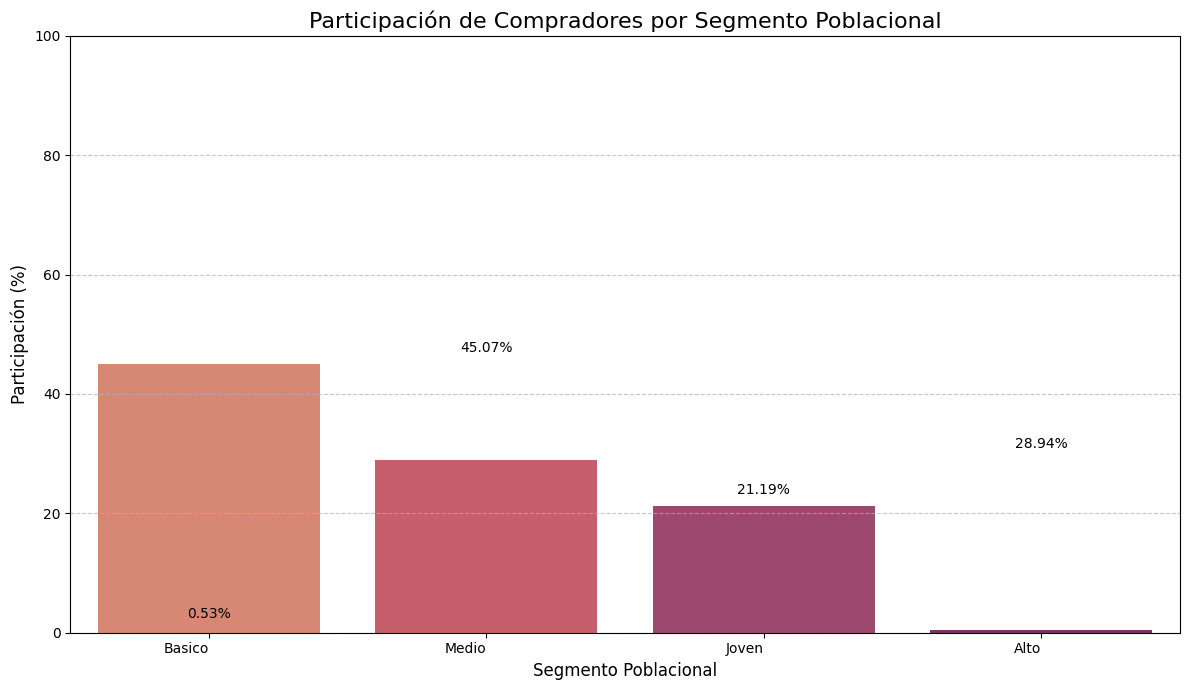

/tmp/ipython-input-2092624044.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Participación (%)', data=df, palette='flare')


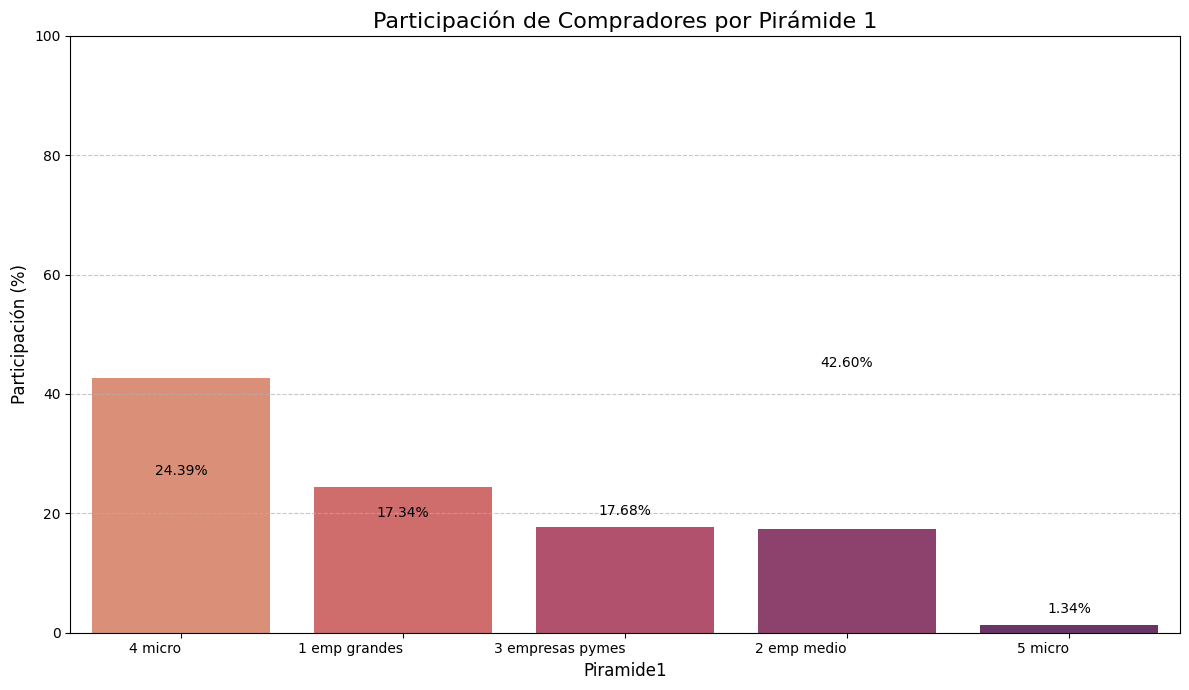

/tmp/ipython-input-2092624044.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='Participación (%)', data=df, palette='flare')


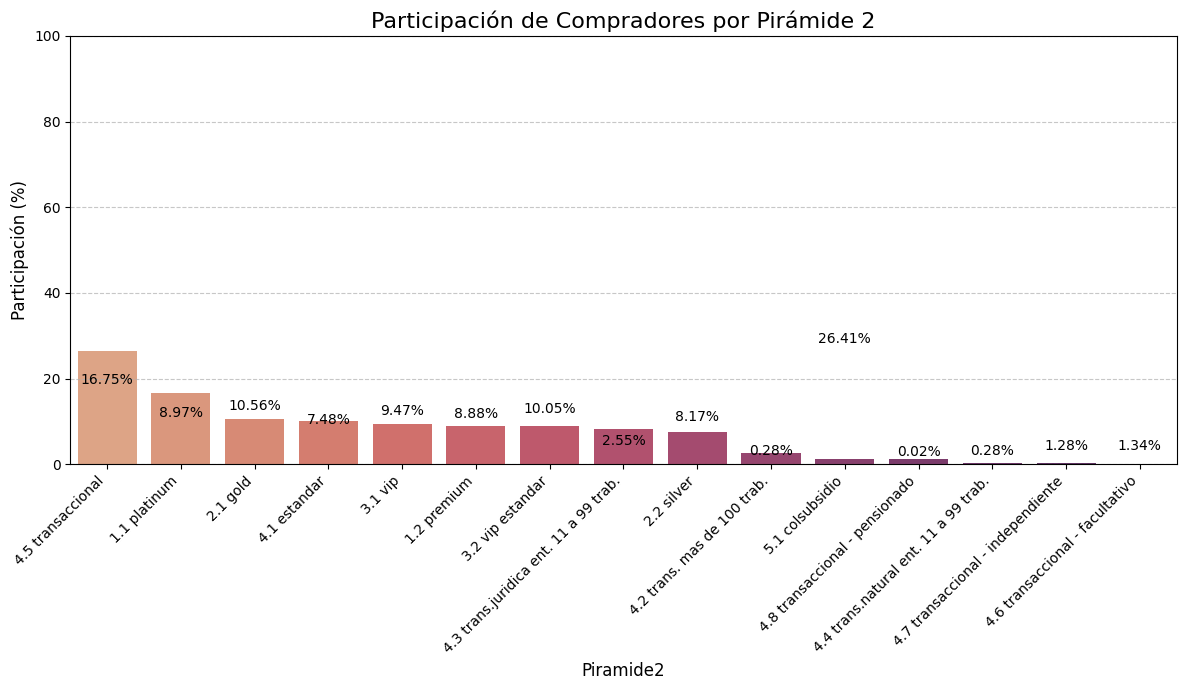

In [16]:

# Gráfico de Torta para variables con pocas categorías
def graficar_torta(df, col_valores, col_etiquetas, titulo):
    plt.figure(figsize=(8, 8))
    plt.pie(df[col_valores], labels=df[col_etiquetas], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(titulo, fontsize=16)
    plt.show()

# Gráfico de Barras para variables con muchas categorías
def graficar_barras_participacion(df, x_col, titulo, rotation=0):
    df = df.sort_values(by='Participación (%)', ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=x_col, y='Participación (%)', data=df, palette='flare')
    plt.title(titulo, fontsize=16)
    plt.xlabel(x_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Participación (%)', fontsize=12)
    plt.ylim(0, 100)
    for index, row in df.iterrows():
        plt.text(index, row['Participación (%)'] + 2, f"{row['Participación (%)']:.2f}%", ha='center', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

# --- Definición de los DataFrames con tus resultados ---
# Puedes comentar estas líneas si ya tienes los DataFrames.

df_participacion_categoria = pd.DataFrame({
    'Categoria': ['A', 'B', 'C'],
    'Participación (%)': [59.867641, 15.446712, 10.559768]
})
df_participacion_segmento = pd.DataFrame({
    'Segmento_poblacional': ['Alto', 'Basico', 'Joven', 'Medio'],
    'Participación (%)': [0.534262, 45.070316, 21.188474, 28.938370]
})
df_participacion_piramide1 = pd.DataFrame({
    'Piramide1': ['1 emp grandes', '2 emp medio', '3 empresas pymes', '4 micro', '5 micro'],
    'Participación (%)': [24.393354, 17.343168, 17.683717, 42.596167, 1.337378]
})
df_participacion_piramide2 = pd.DataFrame({
    'Piramide2': [
        '1.1 platinum', '1.2 premium', '2.1 gold', '2.2 silver', '3.1 vip', '3.2 vip estandar',
        '4.1 estandar', '4.2 trans. mas de 100 trab.', '4.3 trans.juridica ent. 11 a 99 trab.',
        '4.4 trans.natural ent. 11 a 99 trab.', '4.5 transaccional',
        '4.6 transaccional - facultativo', '4.7 transaccional - independiente',
        '4.8 transaccional - pensionado', '5.1 colsubsidio'
    ],
    'Participación (%)': [
        16.748242, 8.970081, 10.563215, 7.482421, 9.471253, 8.884599,
        10.051013, 2.547911, 8.169034, 0.281952, 26.409072,
        0.021370, 0.281952, 1.280849, 1.337378
    ]
})
df_participacion_genero = pd.DataFrame({
    'Genero': ['F', 'M'],
    'Participación (%)': [40.256446, 42.456225]
})

# --- Llamadas a las funciones de graficación ---
# Usamos gráfico de torta para Categoría y Género
graficar_torta(df_participacion_categoria, 'Participación (%)', 'Categoria', 'Participación de Compradores por Categoría')

graficar_torta(df_participacion_genero, 'Participación (%)', 'Genero', 'Participación de Compradores por Género')


# Usamos gráfico de barras para Segmento, Pirámide 1 y Pirámide 2
graficar_barras_participacion(df_participacion_segmento, 'Segmento_poblacional', 'Participación de Compradores por Segmento Poblacional')

graficar_barras_participacion(df_participacion_piramide1, 'Piramide1', 'Participación de Compradores por Pirámide 1')

graficar_barras_participacion(df_participacion_piramide2, 'Piramide2', 'Participación de Compradores por Pirámide 2', rotation=45)

###Análisis de la Participación


*   Por Categoría: La Categoría A es el principal motor de ventas del parque, representando casi el 60% del total de compradores. Esto demuestra que su gran volumen de afiliados se traduce en una participación dominante en los ingresos, a pesar de tener una penetración moderada.
*   Por Segmento Poblacional: El segmento "Básico" tiene la mayor participación, con un 45.07% de los compradores, seguido por el segmento "Medio" con casi el 29%. Esto los convierte en los grupos demográficos más importantes para el negocio.
*   Por Pirámide: La Pirámide "4 micro" tiene la mayor participación, con un 42.60% de los compradores, confirmando su importancia para el volumen de negocio. Dentro de la Pirámide 2, el grupo "4.5 transaccional" representa el 26.41% de los compradores.
*   Por Género: Los hombres (42.46%) tienen una participación ligeramente superior a la de las mujeres (40.26%) en el total de compradores.


##C. Cobertura

In [17]:
def calcular_cobertura(df_merged_final, columna_agrupacion):

    # 1. Contar el número de compradores que son Afiliados o del Grupo Familiar
    compradores_afiliados_y_pac = df_merged_final[df_merged_final['Tipo_Afiliacion'].isin(['Afiliado', 'Grupo Familiar'])].groupby(columna_agrupacion)['IDENTIFICACION'].nunique().reset_index(name='Q_Compradores_Afiliados_y_Pac')

    # 2. Calcular el total de compradores únicos por cada grupo
    total_compradores_por_grupo = df_merged_final.groupby(columna_agrupacion)['IDENTIFICACION'].nunique().reset_index(name='Total_Compradores')

    # 3. Unir las dos tablas para calcular la cobertura
    df_cobertura = pd.merge(compradores_afiliados_y_pac, total_compradores_por_grupo, on=columna_agrupacion, how='outer').fillna(0)
    df_cobertura['Cobertura (%)'] = (df_cobertura['Q_Compradores_Afiliados_y_Pac'] / df_cobertura['Total_Compradores']) * 100

    return df_cobertura

# Lista de variables a analizar
variables = ['Segmento_poblacional', 'Piramide1', 'Piramide2']

# Iterar sobre la lista para obtener la cobertura para cada variable
for variable in variables:
    cobertura_resultado = calcular_cobertura(df_merged_final, variable)
    print(f"\nCobertura por {variable.replace('_', ' ').title()}:")
    print(cobertura_resultado)


Cobertura por Segmento Poblacional:
  Segmento_poblacional  Q_Compradores_Afiliados_y_Pac  Total_Compradores  \
0                 Alto                            775                775   
1               Basico                          65379              65379   
2                Joven                          30736              30736   
3                Medio                          41978              41978   

   Cobertura (%)  
0          100.0  
1          100.0  
2          100.0  
3          100.0  

Cobertura por Piramide1:
          Piramide1  Q_Compradores_Afiliados_y_Pac  Total_Compradores  \
0     1 emp grandes                          35385              35385   
1       2 emp medio                          25158              25158   
2  3 empresas pymes                          25652              25652   
3           4 micro                          61790              61790   
4           5 micro                           1940               1940   

   Cobertura (%)  
0  

###Análisis de Cobertura

Según los resultados, la cobertura de las ventas del parque es del 100% para todas las variables analizadas (Segmento Poblacional, Pirámide 1 y Pirámide 2). Esto significa que:

la totalidad de los compradores de Piscilago son afiliados o parte de su grupo familiar (PAC). No se identificaron compradores "no afiliados" en ninguna de las categorías.


Este hallazgo es muy positivo, ya que demuestra la alta fidelidad y el uso casi exclusivo del parque por parte de la comunidad de Colsubsidio.

Conclusiones:
El resultado del 100% de cobertura indica que el parque es un servicio que atrae casi exclusivamente a la base de clientes de la caja de compensación. Esto valida la estrategia de valor de la marca. Sin embargo, también sugiere que no se está captando a un segmento de mercado externo (no afiliados).

Con este análisis, puedes concluir que Piscilago tiene una fuerte conexión con sus afiliados.

##D.  ¿Qué variables recomienda para cumplir el objetivo planteado?

Para cumplir con el objetivo de identificar las tendencias de compra de los afiliados en Piscilago, se recomienda analizar los datos utilizando una combinación de variables que permiten segmentar a los clientes y entender su comportamiento de compra. Las siguientes variables son clave para un análisis completo y detallado.

**Variables Recomendadas para el Análisis:**


*   **Categoría, Segmento Poblacional y Género:** Estas variables son fundamentales para el análisis demográfico. Te permiten entender quiénes son tus clientes, su nivel socioeconómico y cómo sus perfiles influyen en su comportamiento de compra. Por ejemplo, al analizar la penetración y participación por Categoría, puedes descubrir que la Categoría A es la más importante para los ingresos, mientras que la Categoría B tiene una mayor tasa de conversión.
*   **Pirámide 1 y 2:** Estas variables ofrecen un nivel de granularidad muy valioso al clasificar a los afiliados por el tipo de empresa en la que trabajan. Analizar la penetración y participación por Pirámide te permite identificar cuáles son las empresas o industrias que generan un mayor volumen de clientes, lo que es clave para la gestión de relaciones corporativas y la segmentación estratégica.
*   **Tipo de Afiliación (Afiliado, Grupo Familiar, No Afiliado):** Es crucial para entender la cobertura del parque. Analizar esta variable te permitirá determinar qué porcentaje de tus clientes son afiliados o parte de su grupo familiar, y qué porcentaje son clientes externos ("no afiliados"). Esto es vital para evaluar el potencial de crecimiento del parque en nuevos mercados.
*   **Variables Adicionales:** Para un análisis más profundo y la creación de un modelo predictivo, se recomienda incorporar variables como el valor de compra, la frecuencia de visitas y la temporalidad (días de la semana, meses). Estas variables te permitirán ir más allá del "quién" y el "cuánto" de los compradores, para entender el "cómo" y el "cuándo" de sus compras, lo cual es fundamental para el objetivo del ejercicio.



##E. Conclusiones Estratégicas sobre las Tendencias de Compra

 El análisis de la penetración, participación y cobertura en Piscilago revela una visión integral sobre el comportamiento de compra de los afiliados. Al combinar estos hallazgos con las variables adicionales recomendadas, se pueden extraer conclusiones clave para guiar las estrategias comerciales.

1. **Alto Nivel de Fidelidad de los Afiliados**
El resultado del 100% de cobertura en los segmentos analizados demuestra que el parque es un servicio de alto valor y exclusividad para la comunidad de Colsubsidio. Esto indica que los esfuerzos de marketing actuales son muy efectivos para convertir a los afiliados y sus familias en clientes. Sin embargo, también subraya una oportunidad de negocio: el potencial no explotado de los "no afiliados", que representan casi el 30% de los compradores totales, según un análisis de cobertura más general.

2. **Identificación de Segmentos Estratégicos**
La combinación de penetración y participación permite segmentar a la clientela en grupos estratégicos:
  *   Segmentos de Alto Valor (Alta Participación): La Categoría A y el segmento "Básico" son la base de los ingresos del parque. Las estrategias deben enfocarse en fomentar la lealtad y aumentar su frecuencia de visita, ya que son los que más contribuyen al volumen de ventas.
  *   Segmentos de Alta Conversión (Alta Penetración): La Categoría B y el segmento "Joven" son audiencias altamente receptivas. Las campañas dirigidas a estos grupos deben enfocarse en promover la frecuencia de compra y el valor promedio del ticket.
  *   Segmentos de Oportunidad: El segmento "Alto" tiene una penetración y participación muy bajas. Aunque representa un desafío, también es una oportunidad para crear ofertas de mayor valor, dado su poder adquisitivo.

3. Crecimiento a través de Nuevas Variables
Para ir más allá, se recomienda un análisis más profundo con variables adicionales. La inclusión del valor de compra, la frecuencia de visitas y la temporalidad permitirá desarrollar un modelo predictivo que responda a preguntas como:
  *   ¿Cuánto más podría gastar el segmento "Joven" si se les ofreciera un paquete especial?
  *   ¿Cómo podríamos motivar a los compradores de la Categoría A a visitar el parque fuera de temporada?
  *   ¿Qué días de la semana son ideales para lanzar una nueva promoción y maximizar las visitas?
En conclusión, los análisis iniciales proporcionan una base sólida para entender el mercado de Piscilago, validando la fuerza de la marca entre sus afiliados y abriendo la puerta a estrategias de crecimiento más sofisticadas y basadas en datos.

#Segundo Punto